## common setups: import utils functions

In [1]:
from evaluation import *
from save_load import *

In [2]:
import matplotlib
import matplotlib.pyplot as plt

# classes = ['F', 'DCIS', 'AD', 'I']
classes = ['Normal', 'Tumour']
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
colors = ['#1f77b4', '#ff7f0e']

def plot_embeddings(embeddings, targets, xlim=None, ylim=None):
#     plt.figure(figsize=(10,10))
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.tick_params(axis="x", labelsize=18)
    ax.tick_params(axis="y", labelsize=18)
    
    for i in range(n_classes):
        inds = np.where(targets==i)[0]
        plt.scatter(embeddings[inds,0], embeddings[inds,1], alpha=0.5, color=colors[i])
    if xlim:
        plt.xlim(xlim[0], xlim[1])
    if ylim:
        plt.ylim(ylim[0], ylim[1])
    plt.legend(classes, prop={'size': 20})

def extract_embeddings(dataloader, model):
    with torch.no_grad():
        model.eval()
        embeddings = np.zeros((len(dataloader.dataset), len(dataloader.dataset.labels_set)+10))
        labels = np.zeros(len(dataloader.dataset))
        k = 0
        for images, target in dataloader:
            if cuda:
                images = images.cuda()
            embeddings[k:k+len(images)] = model.get_embedding(images).data.cpu().numpy()
            labels[k:k+len(images)] = target.numpy()
            k += len(images)
    return embeddings, labels

## BreakHis

In [2]:
from torchvision import transforms
# from datasets import BaseHistoFromSampler, SlideDataSampler, SlideSampler
from datasets import BreakHis, BreakHisPIL
fold = 4
ptrain = '/mnt/DATA_OTHER/breakHis/mkfold/fold%d/train/'%fold
ptest = '/mnt/DATA_OTHER/breakHis/mkfold/fold%d/test/'%fold
train_dataset = BreakHisPIL(ptrain, transform=transforms.Compose([
                                 transforms.ToTensor()
                                 
                             ]))
test_dataset = BreakHisPIL(ptest,data_aug=False, transform=transforms.Compose([
                                 transforms.ToTensor()
                                 
                             ]))
n_classes = len(test_dataset.labels_set)

In [3]:
# Set up data loaders
cuda = torch.cuda.is_available()
batch_size = 10
kwargs = {'num_workers': 3, 'pin_memory': True} if cuda else {}
# train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, **kwargs)

In [4]:
from networks import TripletClassificationNet, BreakHisEmbeddingNet
from googlenet import InceptionEmbeddingBreakHis
from resnet import ResNet18

from losses import TripletClassificationLoss
from metrics import TripletAccumulatedAccuracyMetric

margin = 1
# ------------------------- normal cnn ----------------------------------------------------------------------
embedding_net = BreakHisEmbeddingNet(n_classes)
model_name = 'baseline_Triplet_C_breakHis4_daug_2l1**1.5'
model = TripletClassificationNet(embedding_net, n_classes)
if cuda:
    model.cuda()
model.eval()
model=load_model(model, model_name, 12)

In [5]:
c=conf_matrix(model,test_loader,list(test_loader.dataset.labels_set), True)
print(test_loader.dataset.label_name_list)
print(c)
print(f1_score(c))
# accuracy
t=0
for i in range(2):
    t+=c[i][i]
print(t/c.sum())

['B', 'M']
[[ 678  257]
 [ 156 1607]]
[0.76653477 0.88613179]
0.8469236471460341


In [54]:
(8619+8419+9069+8391+9127)/5.0

8725.0

In [6]:
from networks import TripletClassificationNet, BreakHisEmbeddingNet
from googlenet import InceptionEmbeddingBreakHis
from resnet import ResNet18

from losses import TripletClassificationLoss
from metrics import TripletAccumulatedAccuracyMetric

margin = 1
# ------------------------- resnet ----------------------------------------------------------------------
embedding_net = ResNet18()
model = TripletClassificationNet(embedding_net, n_classes)
model_name = 'baseline_Triplet_C_breakHis1_daug_focal2'
if cuda:
    model.cuda()
model.eval()
model=load_model(model, model_name, 25)

RuntimeError: Error(s) in loading state_dict for TripletClassificationNet:
	Missing key(s) in state_dict: "embedding_net.conv1.weight", "embedding_net.bn1.weight", "embedding_net.bn1.bias", "embedding_net.bn1.running_mean", "embedding_net.bn1.running_var", "embedding_net.layer1.0.conv1.weight", "embedding_net.layer1.0.bn1.weight", "embedding_net.layer1.0.bn1.bias", "embedding_net.layer1.0.bn1.running_mean", "embedding_net.layer1.0.bn1.running_var", "embedding_net.layer1.0.conv2.weight", "embedding_net.layer1.0.bn2.weight", "embedding_net.layer1.0.bn2.bias", "embedding_net.layer1.0.bn2.running_mean", "embedding_net.layer1.0.bn2.running_var", "embedding_net.layer1.0.shortcut.0.weight", "embedding_net.layer1.0.shortcut.1.weight", "embedding_net.layer1.0.shortcut.1.bias", "embedding_net.layer1.0.shortcut.1.running_mean", "embedding_net.layer1.0.shortcut.1.running_var", "embedding_net.layer1.1.conv1.weight", "embedding_net.layer1.1.bn1.weight", "embedding_net.layer1.1.bn1.bias", "embedding_net.layer1.1.bn1.running_mean", "embedding_net.layer1.1.bn1.running_var", "embedding_net.layer1.1.conv2.weight", "embedding_net.layer1.1.bn2.weight", "embedding_net.layer1.1.bn2.bias", "embedding_net.layer1.1.bn2.running_mean", "embedding_net.layer1.1.bn2.running_var", "embedding_net.layer2.0.conv1.weight", "embedding_net.layer2.0.bn1.weight", "embedding_net.layer2.0.bn1.bias", "embedding_net.layer2.0.bn1.running_mean", "embedding_net.layer2.0.bn1.running_var", "embedding_net.layer2.0.conv2.weight", "embedding_net.layer2.0.bn2.weight", "embedding_net.layer2.0.bn2.bias", "embedding_net.layer2.0.bn2.running_mean", "embedding_net.layer2.0.bn2.running_var", "embedding_net.layer2.0.shortcut.0.weight", "embedding_net.layer2.0.shortcut.1.weight", "embedding_net.layer2.0.shortcut.1.bias", "embedding_net.layer2.0.shortcut.1.running_mean", "embedding_net.layer2.0.shortcut.1.running_var", "embedding_net.layer2.1.conv1.weight", "embedding_net.layer2.1.bn1.weight", "embedding_net.layer2.1.bn1.bias", "embedding_net.layer2.1.bn1.running_mean", "embedding_net.layer2.1.bn1.running_var", "embedding_net.layer2.1.conv2.weight", "embedding_net.layer2.1.bn2.weight", "embedding_net.layer2.1.bn2.bias", "embedding_net.layer2.1.bn2.running_mean", "embedding_net.layer2.1.bn2.running_var", "embedding_net.layer3.0.conv1.weight", "embedding_net.layer3.0.bn1.weight", "embedding_net.layer3.0.bn1.bias", "embedding_net.layer3.0.bn1.running_mean", "embedding_net.layer3.0.bn1.running_var", "embedding_net.layer3.0.conv2.weight", "embedding_net.layer3.0.bn2.weight", "embedding_net.layer3.0.bn2.bias", "embedding_net.layer3.0.bn2.running_mean", "embedding_net.layer3.0.bn2.running_var", "embedding_net.layer3.0.shortcut.0.weight", "embedding_net.layer3.0.shortcut.1.weight", "embedding_net.layer3.0.shortcut.1.bias", "embedding_net.layer3.0.shortcut.1.running_mean", "embedding_net.layer3.0.shortcut.1.running_var", "embedding_net.layer3.1.conv1.weight", "embedding_net.layer3.1.bn1.weight", "embedding_net.layer3.1.bn1.bias", "embedding_net.layer3.1.bn1.running_mean", "embedding_net.layer3.1.bn1.running_var", "embedding_net.layer3.1.conv2.weight", "embedding_net.layer3.1.bn2.weight", "embedding_net.layer3.1.bn2.bias", "embedding_net.layer3.1.bn2.running_mean", "embedding_net.layer3.1.bn2.running_var", "embedding_net.layer4.0.conv1.weight", "embedding_net.layer4.0.bn1.weight", "embedding_net.layer4.0.bn1.bias", "embedding_net.layer4.0.bn1.running_mean", "embedding_net.layer4.0.bn1.running_var", "embedding_net.layer4.0.conv2.weight", "embedding_net.layer4.0.bn2.weight", "embedding_net.layer4.0.bn2.bias", "embedding_net.layer4.0.bn2.running_mean", "embedding_net.layer4.0.bn2.running_var", "embedding_net.layer4.0.shortcut.0.weight", "embedding_net.layer4.0.shortcut.1.weight", "embedding_net.layer4.0.shortcut.1.bias", "embedding_net.layer4.0.shortcut.1.running_mean", "embedding_net.layer4.0.shortcut.1.running_var", "embedding_net.layer4.1.conv1.weight", "embedding_net.layer4.1.bn1.weight", "embedding_net.layer4.1.bn1.bias", "embedding_net.layer4.1.bn1.running_mean", "embedding_net.layer4.1.bn1.running_var", "embedding_net.layer4.1.conv2.weight", "embedding_net.layer4.1.bn2.weight", "embedding_net.layer4.1.bn2.bias", "embedding_net.layer4.1.bn2.running_mean", "embedding_net.layer4.1.bn2.running_var", "embedding_net.linear1.weight", "embedding_net.linear1.bias", "embedding_net.linear2.weight", "embedding_net.linear2.bias". 
	Unexpected key(s) in state_dict: "embedding_net.convnet.0.weight", "embedding_net.convnet.0.bias", "embedding_net.convnet.1.weight", "embedding_net.convnet.3.weight", "embedding_net.convnet.3.bias", "embedding_net.convnet.4.weight", "embedding_net.convnet.6.weight", "embedding_net.convnet.6.bias", "embedding_net.convnet.7.weight", "embedding_net.convnet.9.weight", "embedding_net.convnet.9.bias", "embedding_net.convnet.10.weight", "embedding_net.convnet.12.weight", "embedding_net.convnet.12.bias", "embedding_net.convnet.13.weight", "embedding_net.convnet.15.weight", "embedding_net.convnet.15.bias", "embedding_net.convnet.16.weight", "embedding_net.fc.0.weight", "embedding_net.fc.0.bias", "embedding_net.fc.1.weight", "embedding_net.fc.2.weight", "embedding_net.fc.2.bias", "embedding_net.fc.3.weight", "embedding_net.fc.4.weight", "embedding_net.fc.4.bias". 

In [16]:
c=conf_matrix(model,test_loader,list(test_loader.dataset.labels_set), True)
print(test_loader.dataset.label_name_list)
print(c)
print(f1_score(c))
# accuracy
t=0
for i in range(2):
    t+=c[i][i]
print(t/c.sum())

/home/ys309/miniconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/ys309/miniconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/home/ys309/miniconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/ys309/miniconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing 

['B', 'M']
[[ 737  271]
 [ 216 1680]]
[0.75165732 0.87340785]
0.8323002754820936


In [17]:
from networks import TripletClassificationNet, BreakHisEmbeddingNet
from googlenet import InceptionEmbeddingBreakHis
from resnet import ResNet18

from losses import TripletClassificationLoss
from metrics import TripletAccumulatedAccuracyMetric

margin = 1
# ------------------------- googlenet ----------------------------------------------------------------------
embedding_net = InceptionEmbeddingBreakHis(n_classes)
model_name = 'Inception_Triplet_C_BreakHis'
model = TripletClassificationNet(embedding_net, n_classes)
if cuda:
    model.cuda()
model.eval()
model=load_model(model, model_name, 12)

In [18]:
c=conf_matrix(model,test_loader,list(test_loader.dataset.labels_set), True)
print(test_loader.dataset.label_name_list)
print(c)
print(f1_score(c))
# accuracy
t=0
for i in range(2):
    t+=c[i][i]
print(t/c.sum())

/home/ys309/miniconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/ys309/miniconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/ys309/miniconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/home/ys309/miniconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing 

['B', 'M']
[[ 677  331]
 [ 147 1749]]
[0.73908297 0.87977867]
0.8353994490358126


In [39]:
from networks import TripletClassificationNet, BreakHisEmbeddingNet
from googlenet import InceptionEmbeddingBreakHis
from resnet import ResNet18

from losses import TripletClassificationLoss
from metrics import TripletAccumulatedAccuracyMetric

margin = 1
# ------------------------- normal cnn ----------------------------------------------------------------------
embedding_net = BreakHisEmbeddingNet(n_classes)
model_name = 'baseline_Triplet_C_breakHis1_daug_focal2alpha'
model = TripletClassificationNet(embedding_net, n_classes)
if cuda:
    model.cuda()
model.eval()
model=load_model(model, model_name, 16)

In [40]:
c=conf_matrix(model,test_loader,list(test_loader.dataset.labels_set), True)
print(test_loader.dataset.label_name_list)
print(c)
print(f1_score(c))
# accuracy
t=0
for i in range(2):
    t+=c[i][i]
print(t/c.sum())

['B', 'M']
[[ 780  228]
 [ 173 1723]]
[0.79551249 0.89576293]
0.8619146005509641


In [34]:
(8571+8260+9251+8288+9254)/5

8724.8

In [23]:
from networks import SiameseClassificationNet, BreakHisEmbeddingNet
from googlenet import InceptionEmbeddingBreakHis
from resnet import ResNet18

from losses import TripletClassificationLoss
from metrics import TripletAccumulatedAccuracyMetric

margin = 1
# ------------------------- normal cnn ----------------------------------------------------------------------
embedding_net = BreakHisEmbeddingNet(n_classes)
model_name = 'baseline_Siamese_C_breakHis'
model = SiameseClassificationNet(embedding_net, n_classes)
if cuda:
    model.cuda()
model.eval()
model=load_model(model, model_name, 9)

In [24]:
c=conf_matrix(model,test_loader,list(test_loader.dataset.labels_set), True)
print(test_loader.dataset.label_name_list)
print(c)
print(f1_score(c))
# accuracy
t=0
for i in range(2):
    t+=c[i][i]
print(t/c.sum())

/home/ys309/miniconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/ys309/miniconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/home/ys309/miniconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/ys309/miniconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to '

['B', 'M']
[[ 758  250]
 [ 180 1716]]
[0.77903392 0.88865873]
0.8519283746556474


In [5]:
# Set up the network and training parameters
from networks import BreakHisEmbeddingNet, ClassificationNet
from metrics import AccumulatedAccuracyMetric

# ------------------------- normal cnn ----------------------------------------------------------------------
embedding_net = BreakHisEmbeddingNet(n_classes)
model_name = 'baseline_breakHis'
model = ClassificationNet(embedding_net, n_classes)
if cuda:
    model.cuda()
model.eval()
model=load_model(model, model_name, 18)

In [6]:
c=conf_matrix(model,test_loader,list(test_loader.dataset.labels_set), True)
print(test_loader.dataset.label_name_list)
print(c)
print(f1_score(c))
# accuracy
t=0
for i in range(2):
    t+=c[i][i]
print(t/c.sum())

/home/ys309/miniconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/ys309/miniconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/home/ys309/miniconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/ys309/miniconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing 

['B', 'M']
[[ 755  253]
 [ 194 1702]]
[0.77158917 0.88392625]
0.8460743801652892


## colonC

step 0: split data

In [ ]:
# from datasets import divide_data
# dv= divide_data('/mnt/DATA_OTHER/digestPath/Colonoscopy_tissue_segment_dataset/patches/', (3,2,0))
# dv.divide()

step 1: datasets

In [6]:
from torchvision import transforms
from datasets import BaseHistoFromSampler, SlideDataSampler, SlideSampler
ptrain='/mnt/DATA_OTHER/digestPath/Colonoscopy_tissue_segment_dataset/patches/train/'
pval='/mnt/DATA_OTHER/digestPath/Colonoscopy_tissue_segment_dataset/patches/validation/'


train_slide_S = SlideSampler(root_dir=ptrain, n_sample=100)
_, train_slides = train_slide_S._sampler()

val_slide_S = SlideSampler(root_dir=pval, n_sample=100)
_, val_slides = val_slide_S._sampler()

train_slide_SD = SlideDataSampler(slide_dirs=train_slides,n_sample=60, label2rm=['U'])
train_data, train_dataset_w = train_slide_SD._sampler()

val_slide_SD = SlideDataSampler(slide_dirs=val_slides,n_sample=60, label2rm=['U'])
val_data, val_dataset_w = val_slide_SD._sampler()

# mean = (0.485, 0.456, 0.406)
# std = (0.5, 0.5, 0.5)

# train_dataset = BaseHistoFromSampler(imgs=train_data, imgs_w=train_dataset_w, size=224, transform=transforms.Compose([
#                                  transforms.ToTensor(),
#                                  transforms.Normalize(mean, std)
#                              ]))
# test_dataset = BaseHistoFromSampler(imgs=val_data, imgs_w=val_dataset_w, size=224, transform=transforms.Compose([
#                                  transforms.ToTensor(),
#                                  transforms.Normalize(mean, std)
#                              ])
#                             )

train_dataset = BaseHistoFromSampler(imgs=train_data, imgs_w=train_dataset_w, size=224, transform=transforms.Compose([
                                 transforms.ToTensor()
                                 
                             ]))
test_dataset = BaseHistoFromSampler(imgs=val_data, imgs_w=val_dataset_w, size=224, transform=transforms.Compose([
                                 transforms.ToTensor()
                                 
                             ])
                            )

In [7]:
test_dataset.statistic()

{'N': 3635, 'T': 5114}

In [8]:
train_dataset.statistic()

{'N': 3320, 'T': 5085}

dataloader

In [9]:
n_classes = len(test_dataset.labels_set)
cuda = torch.cuda.is_available()
batch_size = 20
kwargs = {'num_workers': 3, 'pin_memory': True} if cuda else {}
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=False, **kwargs)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, **kwargs)

# 0.1 baseline trained with pairs

In [10]:
# Set up the network and training parameters

from networks import EmbeddingNet, ClassificationNet
from metrics import AccumulatedAccuracyMetric
embedding_net = EmbeddingNet(n_classes)
model = ClassificationNet(embedding_net, n_classes)
model_name = 'baseline_Siamese_C_liverC'
if cuda:
    model.cuda()
model.eval()
model=load_model(model, model_name, 4)

In [11]:
c=conf_matrix(model,test_loader,list(test_loader.dataset.labels_set), True)
print(test_loader.dataset.label_name_list)
print(c)
print(f1_score(c))
# accuracy
t=0
for i in range(2):
    t+=c[i][i]
print(t/c.sum())

['N', 'T']
[[ 533 3102]
 [ 245 4869]]
[0.24155903 0.74421093]
0.617441993370671


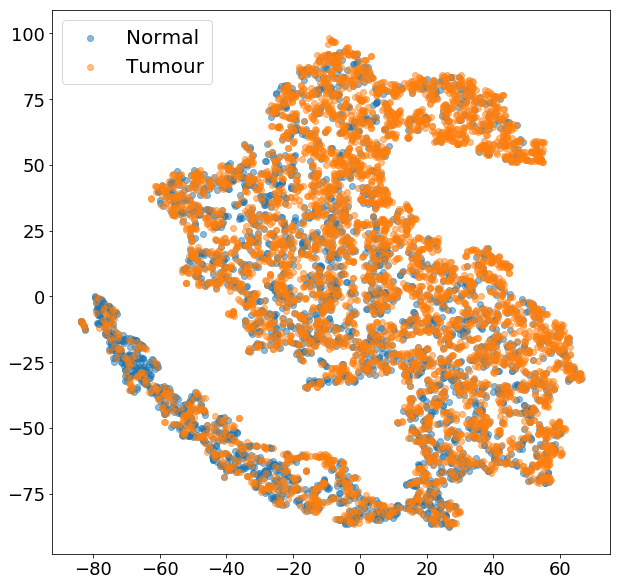

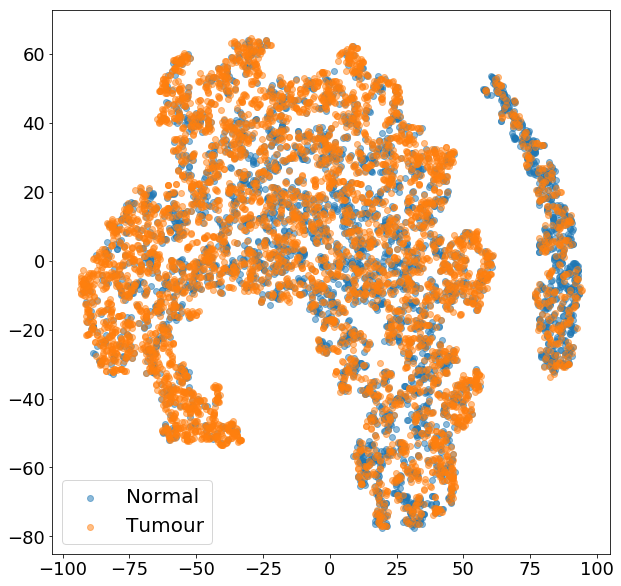

In [12]:
train_embeddings_baseline, train_labels_baseline = extract_embeddings(train_loader, model)
from sklearn.manifold import TSNE
train_embedded = TSNE(n_components=2).fit_transform(train_embeddings_baseline)
plot_embeddings(train_embedded, train_labels_baseline)
val_embeddings_baseline, val_labels_baseline = extract_embeddings(test_loader, model)
val_embedded = TSNE(n_components=2).fit_transform(val_embeddings_baseline)
plot_embeddings(val_embedded, val_labels_baseline)

# 0.2 baseline trained with triplets

In [13]:
# Set up the network and training parameters

from networks import EmbeddingNet, ClassificationNet
from metrics import AccumulatedAccuracyMetric
embedding_net = EmbeddingNet(n_classes)
model = ClassificationNet(embedding_net, n_classes)
model_name = 'baseline_Triplet_C_liverC'
if cuda:
    model.cuda()
model.eval()
model=load_model(model, model_name, 11)

In [14]:
c=conf_matrix(model,test_loader,list(test_loader.dataset.labels_set), True)
print(test_loader.dataset.label_name_list)
print(c)
print(f1_score(c))
# accuracy
t=0
for i in range(2):
    t+=c[i][i]
print(t/c.sum())

['N', 'T']
[[1723 1912]
 [1593 3521]]
[0.49575601 0.66767801]
0.5993827866041833


In [ ]:
train_embeddings_baseline, train_labels_baseline = extract_embeddings(train_loader, model)
from sklearn.manifold import TSNE
train_embedded = TSNE(n_components=2).fit_transform(train_embeddings_baseline)
plot_embeddings(train_embedded, train_labels_baseline)
val_embeddings_baseline, val_labels_baseline = extract_embeddings(test_loader, model)
val_embedded = TSNE(n_components=2).fit_transform(val_embeddings_baseline)
plot_embeddings(val_embedded, val_labels_baseline)

## LiverC

step1: prepare dataset

In [3]:
from torchvision import transforms
from datasets import BaseHistoFromSampler, SlideDataSampler, SlideSampler
ptrain='/mnt/DATA_OTHER/liverC/patches/train/'
pval='/mnt/DATA_OTHER/liverC/patches/validation/'


train_slide_S = SlideSampler(root_dir=ptrain, n_sample=20)
_, train_slides = train_slide_S._sampler()

val_slide_S = SlideSampler(root_dir=pval, n_sample=20)
_, val_slides = val_slide_S._sampler()

train_slide_SD = SlideDataSampler(slide_dirs=train_slides,n_sample=200, label2rm=['U'])
train_data, train_dataset_w = train_slide_SD._sampler()

val_slide_SD = SlideDataSampler(slide_dirs=val_slides,n_sample=200, label2rm=['U'])
val_data, val_dataset_w = val_slide_SD._sampler()

# mean = (0.485, 0.456, 0.406)
# std = (0.5, 0.5, 0.5)

# train_dataset = BaseHistoFromSampler(imgs=train_data, imgs_w=train_dataset_w, size=224, transform=transforms.Compose([
#                                  transforms.ToTensor(),
#                                  transforms.Normalize(mean, std)
#                              ]))
# test_dataset = BaseHistoFromSampler(imgs=val_data, imgs_w=val_dataset_w, size=224, transform=transforms.Compose([
#                                  transforms.ToTensor(),
#                                  transforms.Normalize(mean, std)
#                              ])
#                             )

train_dataset = BaseHistoFromSampler(imgs=train_data, imgs_w=train_dataset_w, size=224, transform=transforms.Compose([
                                 transforms.ToTensor()
                                 
                             ]))
test_dataset = BaseHistoFromSampler(imgs=val_data, imgs_w=val_dataset_w, size=224, transform=transforms.Compose([
                                 transforms.ToTensor()
                                 
                             ])
                            )

In [22]:
test_dataset.statistic()

{'N': 4000, 'T': 3837}

step2: dataloader

In [5]:
n_classes = len(test_dataset.labels_set)
cuda = torch.cuda.is_available()
batch_size = 20
kwargs = {'num_workers': 3, 'pin_memory': True} if cuda else {}
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=False, **kwargs)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, **kwargs)

In [6]:
import torch
torch.cuda.is_available()

True

step3: build network and load

# model 0: baseline (normal CNN without tricks)

# 0.0 baseline model trained with cross entropy

In [27]:
# Set up the network and training parameters
from networks import EmbeddingNet, ClassificationNet
from metrics import AccumulatedAccuracyMetric
embedding_net = EmbeddingNet(n_classes)
model = ClassificationNet(embedding_net, n_classes)
model_name = 'baseline_liverC'
if cuda:
    model.cuda()
model.eval()
model=load_model(model, model_name, 12)

In [28]:
c=conf_matrix(model,test_loader,list(test_loader.dataset.labels_set), True)
print(test_loader.dataset.label_name_list)
print(c)
print(f1_score(c))

# accuracy
t=0
for i in range(2):
    t+=c[i][i]
print(t/c.sum())

['N', 'T']
[[2277 1723]
 [ 315 3522]]
[0.69083738 0.77560009]
0.7399515120581855


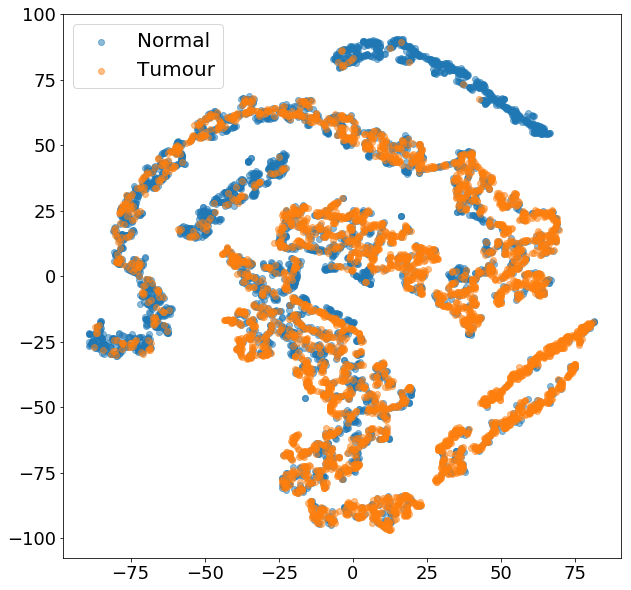

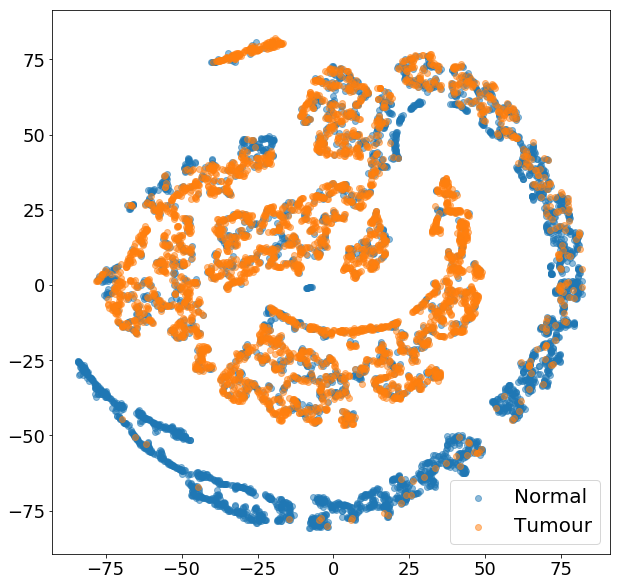

In [29]:
train_embeddings_baseline, train_labels_baseline = extract_embeddings(train_loader, model)
from sklearn.manifold import TSNE
train_embedded = TSNE(n_components=2).fit_transform(train_embeddings_baseline)
plot_embeddings(train_embedded, train_labels_baseline)
val_embeddings_baseline, val_labels_baseline = extract_embeddings(test_loader, model)
val_embedded = TSNE(n_components=2).fit_transform(val_embeddings_baseline)
plot_embeddings(val_embedded, val_labels_baseline)

# 0.1 baseline model trained with pairs

In [23]:
# Set up the network and training parameters

from networks import EmbeddingNet, ClassificationNet
from metrics import AccumulatedAccuracyMetric
embedding_net = EmbeddingNet(n_classes)
model = ClassificationNet(embedding_net, n_classes)
model_name = 'baseline_Siamese_C_liverC'
if cuda:
    model.cuda()
model.eval()
model=load_model(model, model_name, 4)

In [12]:
c=conf_matrix(model,test_loader,list(test_loader.dataset.labels_set), True)
print(test_loader.dataset.label_name_list)
print(c)
print(f1_score(c))
# accuracy
t=0
for i in range(2):
    t+=c[i][i]
print(t/c.sum())

['N', 'T']
[[3435  565]
 [ 234 3603]]
[0.89581432 0.90018738]
0.8980477223427332


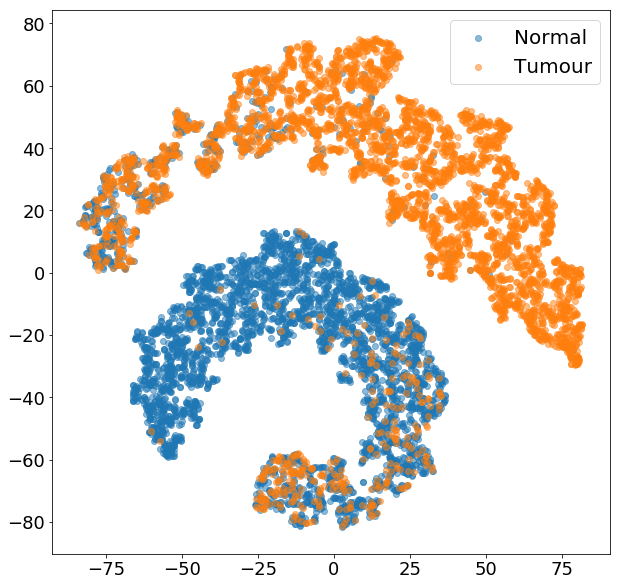

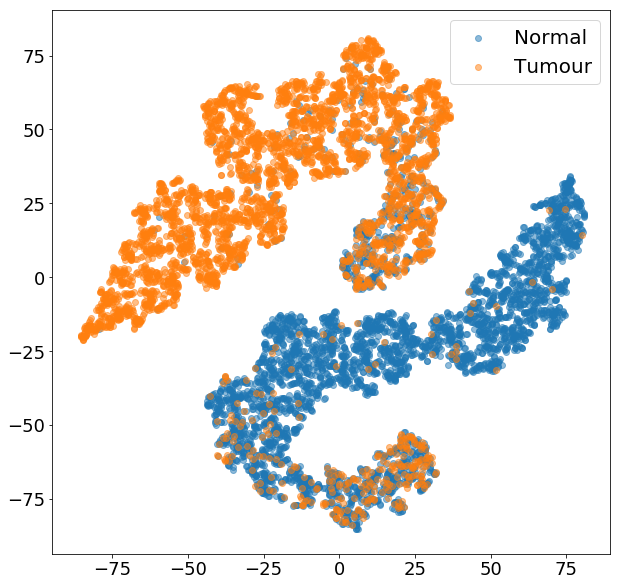

In [24]:
train_embeddings_baseline, train_labels_baseline = extract_embeddings(train_loader, model)
from sklearn.manifold import TSNE
train_embedded = TSNE(n_components=2).fit_transform(train_embeddings_baseline)
plot_embeddings(train_embedded, train_labels_baseline)
val_embeddings_baseline, val_labels_baseline = extract_embeddings(test_loader, model)
val_embedded = TSNE(n_components=2).fit_transform(val_embeddings_baseline)
plot_embeddings(val_embedded, val_labels_baseline)

# 0.2 baseline model trained with triplets

In [25]:
# Set up the network and training parameters

from networks import EmbeddingNet, ClassificationNet
from metrics import AccumulatedAccuracyMetric
embedding_net = EmbeddingNet(n_classes)
model = ClassificationNet(embedding_net, n_classes)
model_name = 'baseline_Triplet_C_liverC'
if cuda:
    model.cuda()
model.eval()
model=load_model(model, model_name, 11)

In [20]:
c=conf_matrix(model,test_loader,list(test_loader.dataset.labels_set), True)
print(test_loader.dataset.label_name_list)
print(c)
print(f1_score(c))
# accuracy
t=0
for i in range(2):
    t+=c[i][i]
print(t/c.sum())

['N', 'T']
[[3534  466]
 [ 329 3508]]
[0.89889355 0.89822046]
0.898558121730254


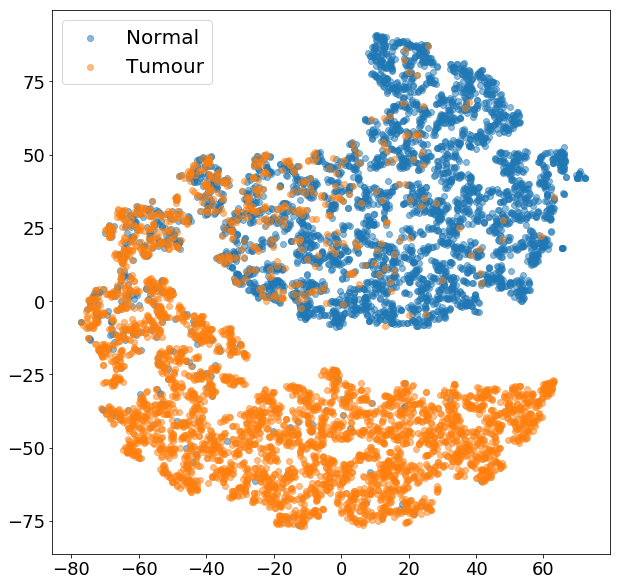

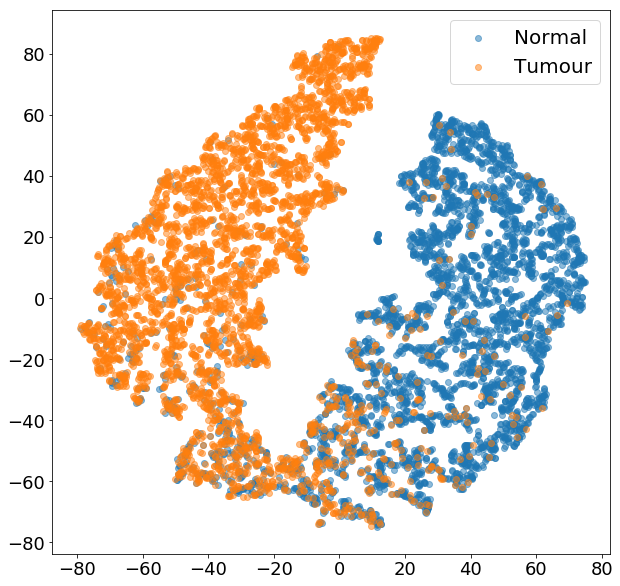

In [26]:
train_embeddings_baseline, train_labels_baseline = extract_embeddings(train_loader, model)
from sklearn.manifold import TSNE
train_embedded = TSNE(n_components=2).fit_transform(train_embeddings_baseline)
plot_embeddings(train_embedded, train_labels_baseline)
val_embeddings_baseline, val_labels_baseline = extract_embeddings(test_loader, model)
val_embedded = TSNE(n_components=2).fit_transform(val_embeddings_baseline)
plot_embeddings(val_embedded, val_labels_baseline)

# model 1: GoogleNet

# 1.0 googlenet trained with cross entropy

In [64]:
# Set up the network and training parameters
from googlenet import GoogLeNet1D, InceptionEmbadding2241D
embedding_net = InceptionEmbadding2241D(n_classes)
model = GoogLeNet1D(embedding_net, n_classes)
model_name = 'GoogLeNet_liverC'

if cuda:
    model.cuda()
model.eval()
model=load_model(model, model_name, 11) #8

step4: get confusion matrix

In [40]:
c=conf_matrix(model,test_loader,list(test_loader.dataset.labels_set), True)

In [41]:
print(test_loader.dataset.label_name_list)
print(c)
print(f1_score(c))

['N', 'T']
[[3789  211]
 [ 328 3509]]
[0.93359616 0.9286754 ]


In [42]:
# accuracy
t=0
for i in range(2):
    t+=c[i][i]
print(t/c.sum())

0.9312236825315809


step5: plot

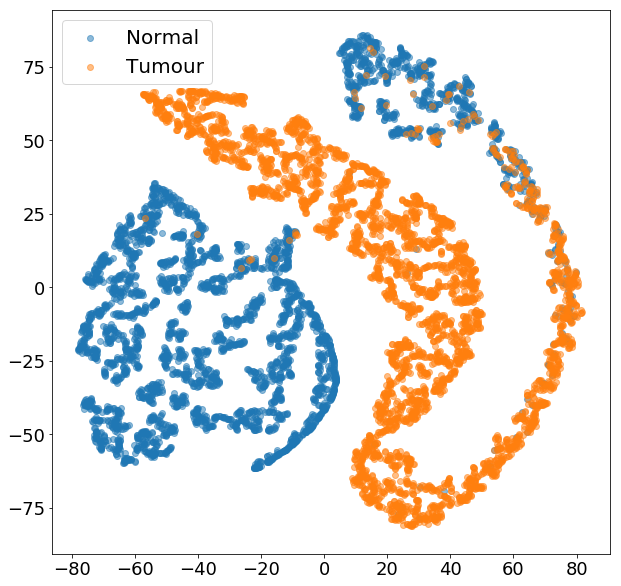

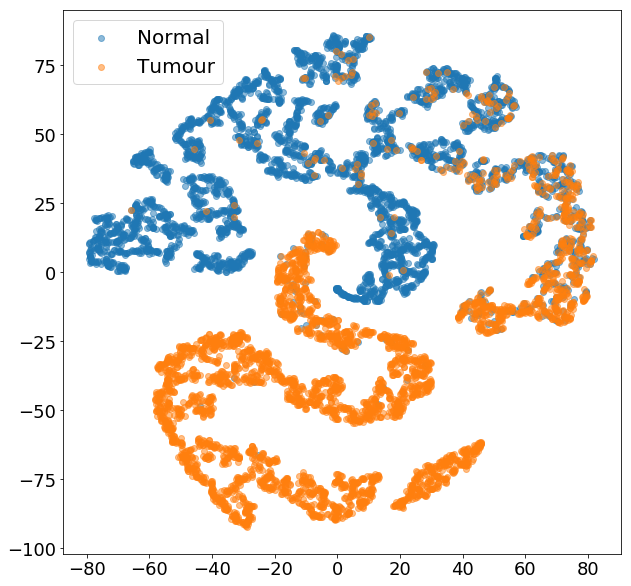

In [65]:
train_embeddings_baseline, train_labels_baseline = extract_embeddings(train_loader, model)
from sklearn.manifold import TSNE
train_embedded = TSNE(n_components=2).fit_transform(train_embeddings_baseline)
plot_embeddings(train_embedded, train_labels_baseline)
val_embeddings_baseline, val_labels_baseline = extract_embeddings(test_loader, model)
val_embedded = TSNE(n_components=2).fit_transform(val_embeddings_baseline)
plot_embeddings(val_embedded, val_labels_baseline)

# 1.1: googlenet Siamese embedding

In [69]:
# Set up the network and training parameters
from networks import SiameseNet
from googlenet import InceptionEmbadding2241D
from losses import ContrastiveLoss

margin = 1.
embedding_net = InceptionEmbadding2241D(n_classes)
model = SiameseNet(embedding_net)
model_name = 'InceptionEmbedding_Siamese_liverC'
if cuda:
    model.cuda()
model.eval()
model=load_model(model,model_name, 20)

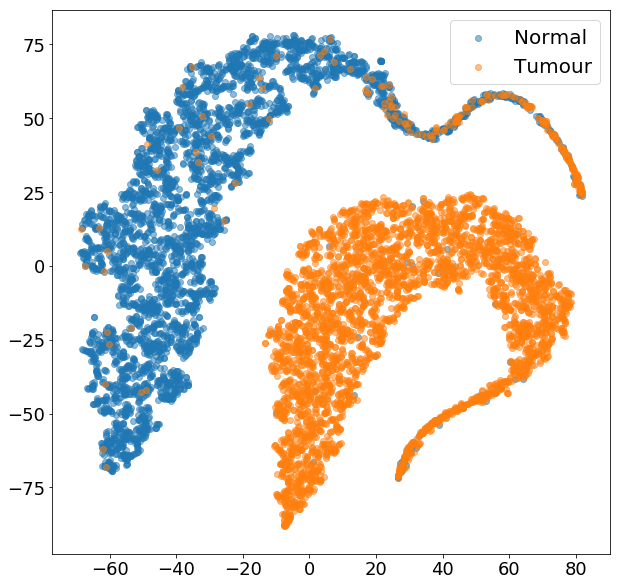

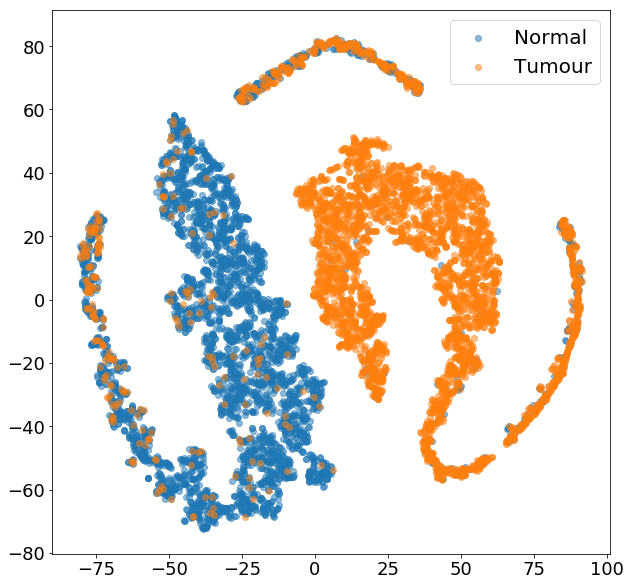

In [70]:
train_embeddings_baseline, train_labels_baseline = extract_embeddings(train_loader, model)
from sklearn.manifold import TSNE
train_embedded = TSNE(n_components=2).fit_transform(train_embeddings_baseline)
plot_embeddings(train_embedded, train_labels_baseline)
val_embeddings_baseline, val_labels_baseline = extract_embeddings(test_loader, model)
val_embedded = TSNE(n_components=2).fit_transform(val_embeddings_baseline)
plot_embeddings(val_embedded, val_labels_baseline)

# model 3: Siamese-classification

In [53]:
# Set up the network and training parameters
from networks import SiameseClassificationNet
from googlenet import InceptionEmbadding2241D
from losses import ContrastiveClassificationLoss
from metrics import SiameseAccumulatedAccuracyMetric

margin = 1.
embedding_net = InceptionEmbadding2241D(2)
model = SiameseClassificationNet(embedding_net, n_classes)
model_name = 'InceptionEmbedding_Siamese_C_liverC'
if cuda:
    model.cuda()
model.eval()
model=load_model(model,model_name, 13)

In [54]:
c=conf_matrix(model,test_loader,list(test_loader.dataset.labels_set), True)

In [63]:
print(test_loader.dataset.label_name_list)
print(c)
print(f1_score(c))

# accuracy
t=0
for i in range(2):
    t+=c[i][i]
print(t/c.sum())

['N', 'T']
[[3666  334]
 [ 256 3581]]
[0.92552386 0.92389061]
0.9247160903406916


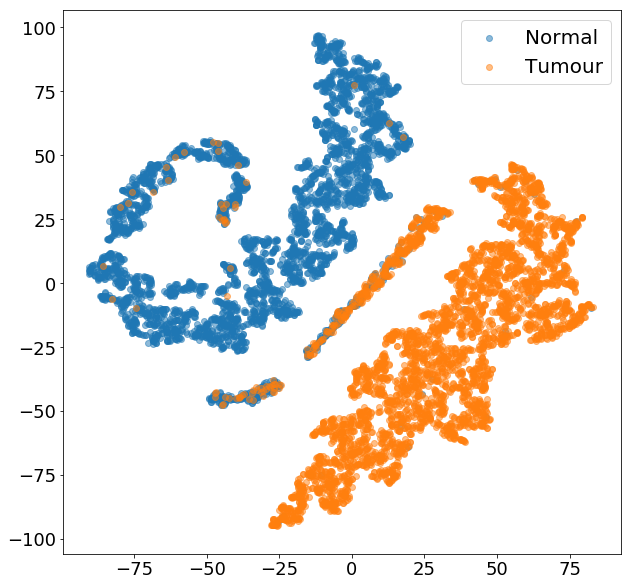

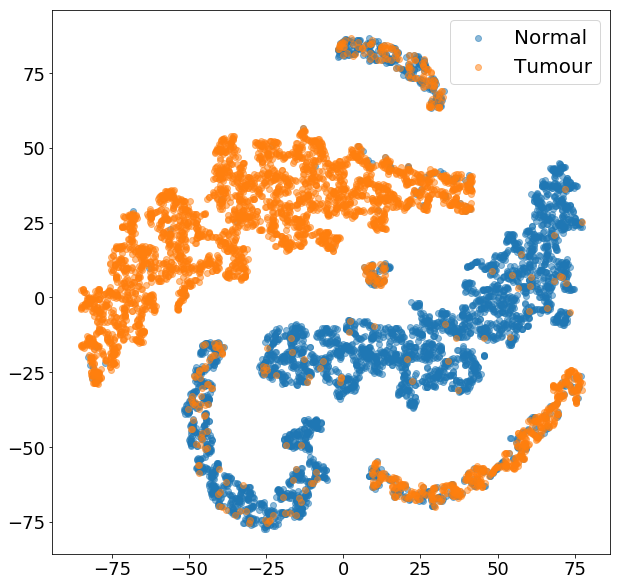

In [62]:
train_embeddings_baseline, train_labels_baseline = extract_embeddings(train_loader, model)
from sklearn.manifold import TSNE
train_embedded = TSNE(n_components=2).fit_transform(train_embeddings_baseline)
plot_embeddings(train_embedded, train_labels_baseline)
val_embeddings_baseline, val_labels_baseline = extract_embeddings(test_loader, model)
val_embedded = TSNE(n_components=2).fit_transform(val_embeddings_baseline)
plot_embeddings(val_embedded, val_labels_baseline)

# model 4: triplet classification

In [75]:
# Set up the network and training parameters
from networks import TripletClassificationNet
from googlenet import InceptionEmbadding2241D
from losses import TripletClassificationLoss
from metrics import TripletAccumulatedAccuracyMetric

margin = 1.
embedding_net = InceptionEmbadding2241D(2)
model = TripletClassificationNet(embedding_net, n_classes)
model_name = 'InceptionEmbedding_Triplet_C_liverC'
if cuda:
    model.cuda()
model.eval()
model=load_model(model,model_name, 9) # 20

In [76]:
c=conf_matrix(model,test_loader,list(test_loader.dataset.labels_set), True)
print(test_loader.dataset.label_name_list)
print(c)
print(f1_score(c))

# accuracy
t=0
for i in range(2):
    t+=c[i][i]
print(t/c.sum())

['N', 'T']
[[3837  163]
 [ 322 3515]]
[0.94055644 0.93546241]
0.9381140742631109


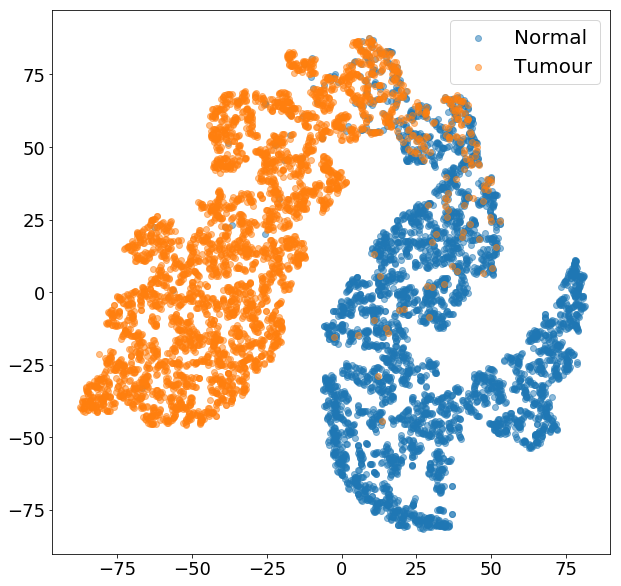

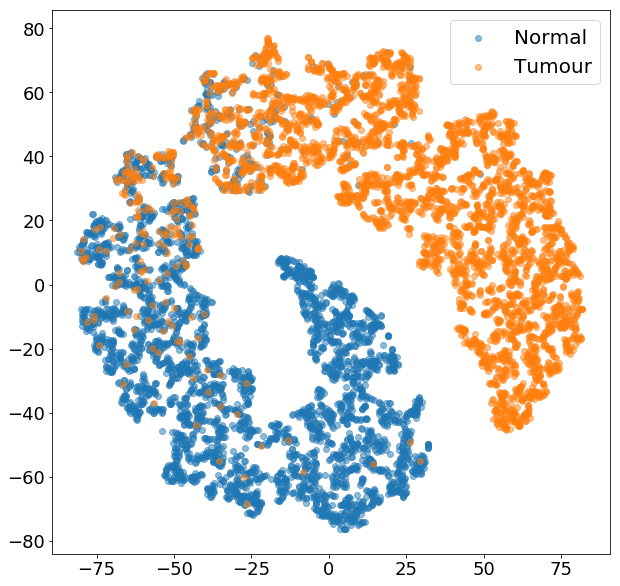

In [77]:
train_embeddings_baseline, train_labels_baseline = extract_embeddings(train_loader, model)
from sklearn.manifold import TSNE
train_embedded = TSNE(n_components=2).fit_transform(train_embeddings_baseline)
plot_embeddings(train_embedded, train_labels_baseline)
val_embeddings_baseline, val_labels_baseline = extract_embeddings(test_loader, model)
val_embedded = TSNE(n_components=2).fit_transform(val_embeddings_baseline)
plot_embeddings(val_embedded, val_labels_baseline)

# model 5: triplet

In [72]:
# Set up the network and training parameters
from networks import TripletNet
from googlenet import InceptionEmbadding2241D
from losses import TripletLoss

margin = 1.
embedding_net = InceptionEmbadding2241D(2)
model = TripletNet(embedding_net)
model_name = 'InceptionEmbedding_Triplet_liverC'
if cuda:
    model.cuda()
model.eval()
model=load_model(model,model_name, 20) # 20

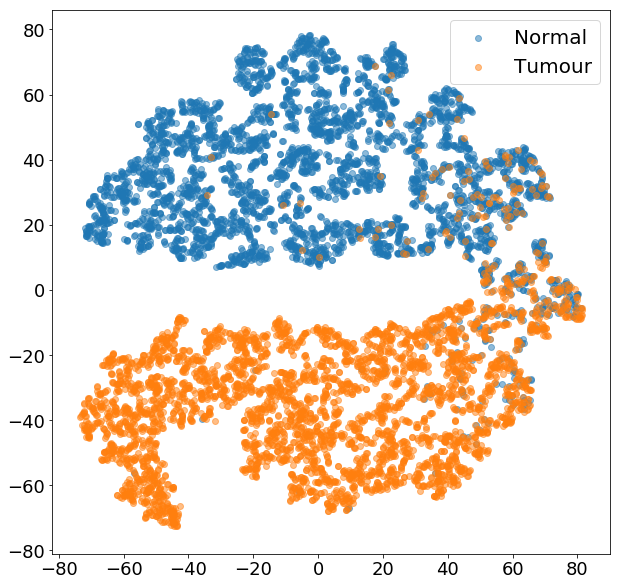

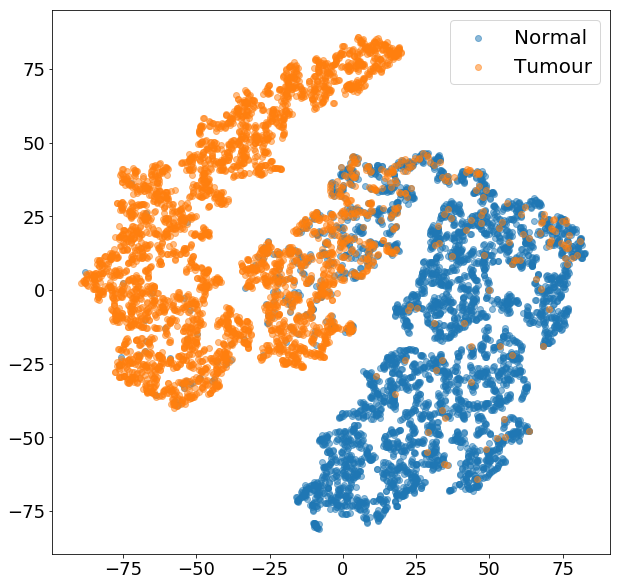

In [74]:
train_embeddings_baseline, train_labels_baseline = extract_embeddings(train_loader, model)
from sklearn.manifold import TSNE
train_embedded = TSNE(n_components=2).fit_transform(train_embeddings_baseline)
plot_embeddings(train_embedded, train_labels_baseline)
val_embeddings_baseline, val_labels_baseline = extract_embeddings(test_loader, model)
val_embedded = TSNE(n_components=2).fit_transform(val_embeddings_baseline)
plot_embeddings(val_embedded, val_labels_baseline)

# Ring Cell

step 1: settup dataset and dataloader

In [3]:
from torchvision import transforms
from datasets import BaseHistoFromSampler, SlideDataSampler, SlideSampler
ptrain='/mnt/DATA_OTHER/digestPath/Signet_ring_cell_dataset/sig-train-pos/patches/ringcell/train/'
pval='/mnt/DATA_OTHER/digestPath/Signet_ring_cell_dataset/sig-train-pos/patches/ringcell/validation/'

train_slide_S = SlideSampler(root_dir=ptrain, n_sample=300)
_, train_slides = train_slide_S._sampler()

val_slide_S = SlideSampler(root_dir=pval, n_sample=200)
_, val_slides = val_slide_S._sampler()

train_slide_SD = SlideDataSampler(slide_dirs=train_slides,n_sample=500)
train_data, train_dataset_w = train_slide_SD._sampler()

val_slide_SD = SlideDataSampler(slide_dirs=val_slides,n_sample=500)
val_data, val_dataset_w = val_slide_SD._sampler()

# mean = (0.485, 0.456, 0.406)
# std = (0.5, 0.5, 0.5)
# train_dataset = BaseHistoFromSampler(imgs=train_data, imgs_w=train_dataset_w, size=224, transform=transforms.Compose([
#                                  transforms.ToTensor(),
#                                  transforms.Normalize(mean, std)
#                              ]))
# test_dataset = BaseHistoFromSampler(imgs=val_data, imgs_w=val_dataset_w, size=224, transform=transforms.Compose([
#                                  transforms.ToTensor(),
#                                  transforms.Normalize(mean, std)
#                              ])
#                             )
train_dataset = BaseHistoFromSampler(imgs=train_data, imgs_w=train_dataset_w, size=112, transform=transforms.Compose([
                                 transforms.ToTensor()
                                 
                             ]))
test_dataset = BaseHistoFromSampler(imgs=val_data, imgs_w=val_dataset_w, size=112, transform=transforms.Compose([
                                 transforms.ToTensor()
                                 
                             ])
                            )
n_classes = len(train_dataset.labels_set)

In [7]:
n_classes = len(test_dataset.labels_set)
cuda = torch.cuda.is_available()
batch_size = 20
kwargs = {'num_workers': 3, 'pin_memory': True} if cuda else {}
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=False, **kwargs)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, **kwargs)

# model: triplet classification

step 2: load model

In [8]:
from networks import TripletClassificationNet
from googlenet import InceptionEmbadding1121D

embedding_net = InceptionEmbadding1121D(n_classes)
model = TripletClassificationNet(embedding_net, n_classes)
model_name = 'Inception_Triplet_ring'
if cuda:
    model.cuda()
model.eval()
model=load_model(model, model_name, 13) # 20

In [14]:
c=conf_matrix(model,test_loader,list(test_loader.dataset.labels_set), True)
print(test_loader.dataset.label_name_list)
print(c)
print(f1_score(c))

# accuracy
t=0
for i in range(2):
    t+=c[i][i]
print(t/c.sum())

['F', 'T']
[[4769    0]
 [  12 2046]]
[0.99874346 0.99707602]
0.9982422733264977


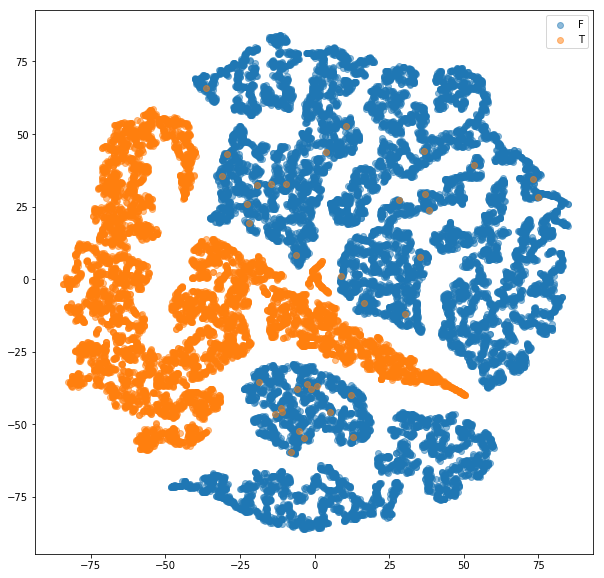

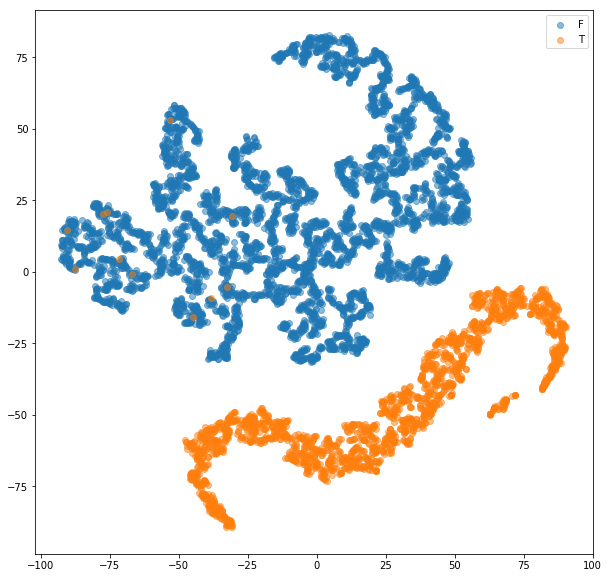

In [15]:
train_embeddings_baseline, train_labels_baseline = extract_embeddings(train_loader, model)
from sklearn.manifold import TSNE
train_embedded = TSNE(n_components=2).fit_transform(train_embeddings_baseline)
plot_embeddings(train_embedded, train_labels_baseline)
val_embeddings_baseline, val_labels_baseline = extract_embeddings(test_loader, model)
val_embedded = TSNE(n_components=2).fit_transform(val_embeddings_baseline)
plot_embeddings(val_embedded, val_labels_baseline)

In [13]:
x=test_dataset[0][0].unsqueeze(0).cuda()
l=test_dataset[0][1]
print(l)
model.get_classification(x)

0


tensor([[-0.0134, -4.3171]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

In [17]:
model.get_embedding(x)

tensor([[ 5.1846,  1.7159,  0.0220, -0.0768,  1.5248,  1.8389, -3.1642,  1.8463,
          1.0584,  1.0849,  3.3721,  0.1910]],
       device='cuda:0', grad_fn=<ThAddmmBackward>)

In [16]:
test_dataset.statistic()

{'F': 4769, 'T': 2058}